<a href="https://colab.research.google.com/github/KhanradCoder/LearnMachineLearning/blob/master/3_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing the Data



In [0]:
import pandas as pd

dataset = pd.read_csv('cancer.csv')
x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:, 1].values

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Principle Component Analysis
In PCA, we take two variables that are correlated and turn them into a vector, reducing the dimensions of our dataset.

<img src="https://liorpachter.files.wordpress.com/2014/05/pca_figure1.jpg" height=400 width=450>

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)

x_train_scaled = pca.fit_transform(x_train)
print(x_train_scaled[:10])

[[ 3.10862742]
 [ 6.99512104]
 [13.39919721]
 [ 3.39219269]
 [-2.11751306]
 [-4.10203571]
 [12.99880763]
 [-0.55358029]
 [-4.83234678]
 [ 4.39581291]]


You can see here if we reduce the data to one dimension we can plot it and perform logistic regression.

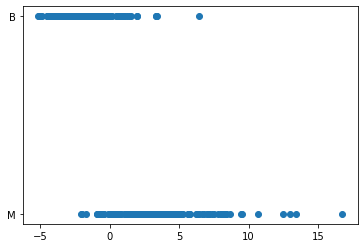

In [0]:
import matplotlib.pyplot as plt
plt.scatter(x_train_scaled, y_train)
plt.show()

# Gradient Boosting

Gradient boosing is one of the most powerful machine learning algorithms. Essentially, the model creates a bunch of weak models and takes the best components of each one using gradient descent. Think of this like random forrest but instead of just averaging all the values, the model picks the best branches of each tree.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier()
gradientboost.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_preds = gradientboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[66  2]
 [ 3 43]]


##XGBoost
The most popular and robust gradient boosting algorithm is XGBoost. This algorithm wins the most kaggle competitions and works well in a variety of scenarios, though it is prone to overfit.

In [0]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_preds = xgboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[66  2]
 [ 3 43]]


**And just like that, you've completed this course. Check the github for links on what to do next. Have a great day and happy coding!**